In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("covid.csv")
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [3]:
df[df["WHO Region"] =="Europe"]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
7,NaN,Armenia,40.0691,45.0382,2020-01-22,0,0,0,0,Europe
16,NaN,Austria,47.5162,14.5501,2020-01-22,0,0,0,0,Europe
17,NaN,Azerbaijan,40.1431,47.5769,2020-01-22,0,0,0,0,Europe
...,...,...,...,...,...,...,...,...,...,...
49053,British Virgin Islands,United Kingdom,18.4207,-64.6400,2020-07-27,8,1,7,0,Europe
49054,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,2020-07-27,99,2,36,61,Europe
49059,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,2020-07-27,13,0,13,0,Europe
49060,Saint Pierre and Miquelon,France,46.8852,-56.3159,2020-07-27,4,0,1,3,Europe


In [4]:
tot=df.groupby(["Country/Region","WHO Region"])[["Confirmed","Deaths","Recovered"]].sum().reset_index()
tot

,Country/Region,WHO Region,Confirmed,Deaths,Recovered
0,Afghanistan,Eastern Mediterranean,1936390,49098,798240
1,Albania,Europe,196702,5708,118877
2,Algeria,Africa,1179755,77972,755897
3,Andorra,Europe,94404,5423,69074
4,Angola,Africa,22662,1078,6573
...,...,...,...,...,...
182,West Bank and Gaza,Eastern Mediterranean,233461,1370,61124
183,Western Sahara,Africa,901,63,648
184,Yemen,Eastern Mediterranean,67180,17707,23779
185,Zambia,Africa,129421,2643,83611


In [5]:
df[df["Date"]=='2020-01-22']

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
256,NaN,Sao Tome and Principe,0.186400,6.613100,2020-01-22,0,0,0,0,Africa
257,NaN,Yemen,15.552727,48.516388,2020-01-22,0,0,0,0,Eastern Mediterranean
258,NaN,Comoros,-11.645500,43.333300,2020-01-22,0,0,0,0,Africa
259,NaN,Tajikistan,38.861000,71.276100,2020-01-22,0,0,0,0,Europe


In [6]:
import plotly as pt

C:\Users\mma\AppData\Local\Temp\ipykernel_8108\852549851.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.pointplot(x=df.Date,y=df.Confirmed,color="red",ci=None)


<Axes: xlabel='Date', ylabel='Confirmed'>

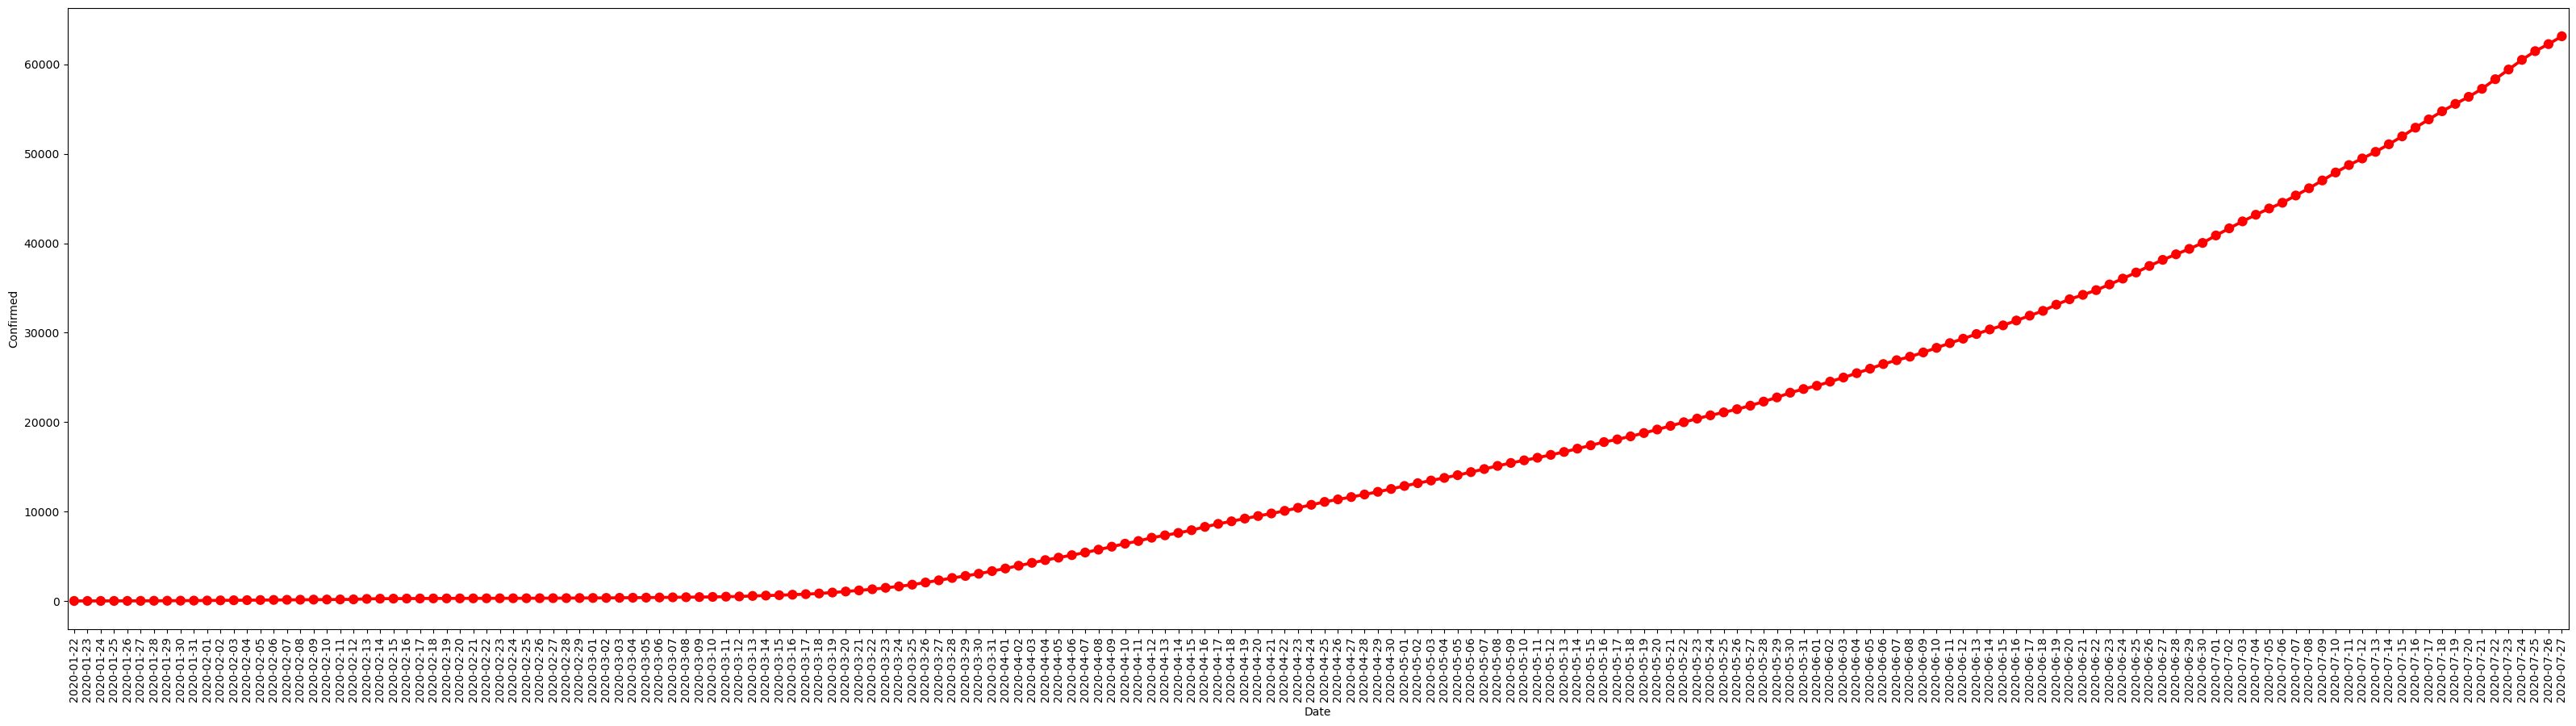

In [7]:
plt.figure(figsize=(40,10))
ax=sns.pointplot(x=df.Date,y=df.Confirmed,color="red",ci=None)
plt.xticks(rotation=90)
ax

In [2]:
july_data = df[(df['Date'].dt.month == 7)]
july_data.head()

In [ ]:
top_act=july_data.groupby(["Country/Region"])[["Confirmed","Deaths","Recovered"]].sum().reset_index()
top_act

In [ ]:
df["Date"]=pd.to_datetime(df["Date"])

In [ ]:
#july_data['Date'] = july_data['Date'].dt.date

In [ ]:
plt.figure(figsize=(40,10))
ax=sns.pointplot(data=july_data,x="Date",y="Confirmed",color="green",errorbar=None)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("conf",fontsize=18)

plt.show()

In [ ]:
jd=df[df["Date"].dt.month==7]
jd

In [ ]:
top_act=df.groupby(["Country/Region"])["Confirmed"].sum().sort_values(ascending=False).reset_index()
top_act.head(15)

In [ ]:
plt.figure(figsize=(40,10))
sns.barplot(data=top_act.head(15),x="Confirmed",y="Country/Region",color="brown")
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel("confimed",fontsize=15)
plt.ylabel("Country",fontsize=15)

In [ ]:
us=df[df["Country/Region"]=='US']
usu=df.groupby("Date")["Active"].sum().reset_index()
usu.head(3)

In [ ]:
India=df[df["Country/Region"]=='India']
Indiai=df.groupby("Date")["Active"].sum().reset_index()
Indiai.head(3)

In [ ]:
China=df[df["Country/Region"]=='China']
Chinac=df.groupby("Date")["Active"].sum().reset_index()
Chinac.head()

In [ ]:
plt.figure(figsize=(40,10))
sns.pointplot(x=usu.index, y=usu.Active,color='red', label="us")
sns.pointplot(x=Indiai.index, y=Indiai.Active,color='orange', label="India")
sns.pointplot(x=Chinac.index, y=Chinac.Active,color='green', label="china")
plt.legend()
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel("country_date",fontsize=15)
plt.ylabel("act_cases",fontsize=15)
plt.show()

In [ ]:
print("usu index:", usu.index)
print("usu Active:", usu.Active)
print("Indiai index:", Indiai.index)
print("Indiai Active:", Indiai.Active)

In [ ]:
print("usu DataFrame:")
print(usu.head())
print("Indiai DataFrame:")
print(Indiai.head())

### Fb prophet

In [9]:
con=df.groupby("Date")[["Active"]].sum().reset_index()
con.head()

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010


In [18]:
con.columns=["ds","y"]

In [19]:
con.tail(4)

,ds,y
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711
187,2020-07-27,6358362


In [11]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [13]:
from prophet import Prophet

In [16]:
b=Prophet()

In [20]:
b.fit(con)

02:42:04 - cmdstanpy - INFO - Chain [1] start processing
02:42:06 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
upc=b.make_future_dataframe(periods=7)
upc.tail(7)

,ds
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [26]:
future=b.predict(upc)
future[["ds","yhat","yhat_lower","yhat_upper"]].tail(5)

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,6.481007e+06,6.434674e+06,6.529700e+06
191,2020-07-31,6.549045e+06,6.499943e+06,6.600563e+06
192,2020-08-01,6.611208e+06,6.564972e+06,6.659518e+06
193,2020-08-02,6.678514e+06,6.629819e+06,6.729908e+06
194,2020-08-03,6.732249e+06,6.683816e+06,6.783133e+06


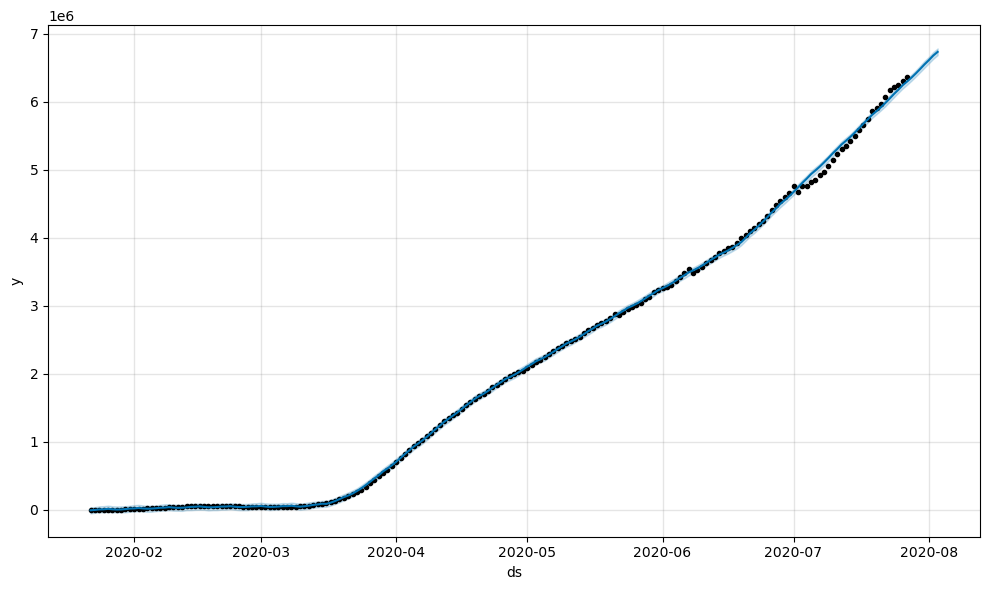

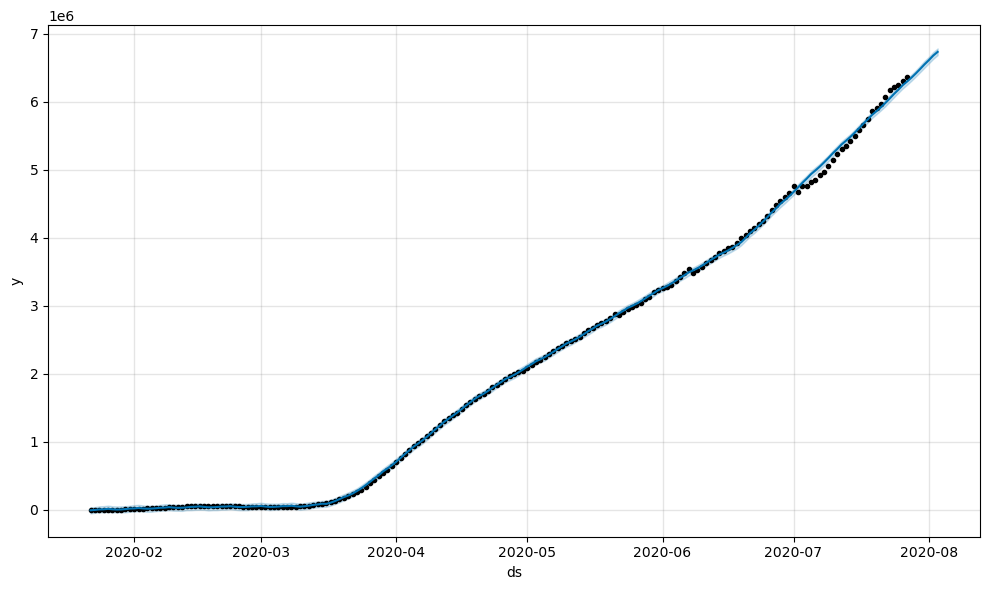

In [27]:
conf_forecast=b.plot(future)
conf_forecast